In [74]:
import pandas as pd
import pickle as pkl
import networkx as nx
import numpy as np
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

## Building a graph

In [8]:
with open ('data/drug_target_interactions.pkl', 'rb') as f:
    drug_target_interactions = pkl.load(f)

In [12]:
drug_target_interactions.head()

,drug_cas,drug_id,drug_name,target_actions,target_amino,target_gene,target_id,target_name,target_organism
0,138068-37-8,DB00001,Lepirudin,[inhibitor],>lcl|BSEQ0016004|Prothrombin\nMAHVRGLQLPGCLALA...,>lcl|BSEQ0016005|Prothrombin (F2)\nATGGCGCACGT...,BE0000048,Prothrombin,Human
1,205923-56-4,DB00002,Cetuximab,[antagonist],>lcl|BSEQ0001530|Epidermal growth factor recep...,>lcl|BSEQ0019007|Epidermal growth factor recep...,BE0000767,Epidermal growth factor receptor,Human
2,205923-56-4,DB00002,Cetuximab,NaN,>lcl|BSEQ0010635|Low affinity immunoglobulin g...,>lcl|BSEQ0010636|Low affinity immunoglobulin g...,BE0000901,Low affinity immunoglobulin gamma Fc region re...,Human
3,205923-56-4,DB00002,Cetuximab,NaN,>lcl|BSEQ0011518|Complement C1r subcomponent\n...,>lcl|BSEQ0011519|Complement C1r subcomponent (...,BE0002093,Complement C1r subcomponent,Human
4,205923-56-4,DB00002,Cetuximab,NaN,>lcl|BSEQ0016678|Complement C1q subcomponent s...,>lcl|BSEQ0016679|Complement C1q subcomponent s...,BE0002094,Complement C1q subcomponent subunit A,Human


In [41]:
drug_target_interactions_graph = nx.from_pandas_edgelist(drug_target_interactions[['drug_id', 'target_id']],
                                                         source = 'drug_id', target = 'target_id',
                                                         edge_attr = True)

In [42]:
drug_target_interactions_graph

In [49]:
nx.is_connected(drug_target_interactions_graph)

False

## Seems like the graph is not fully connected. Inspecting smaller connected components

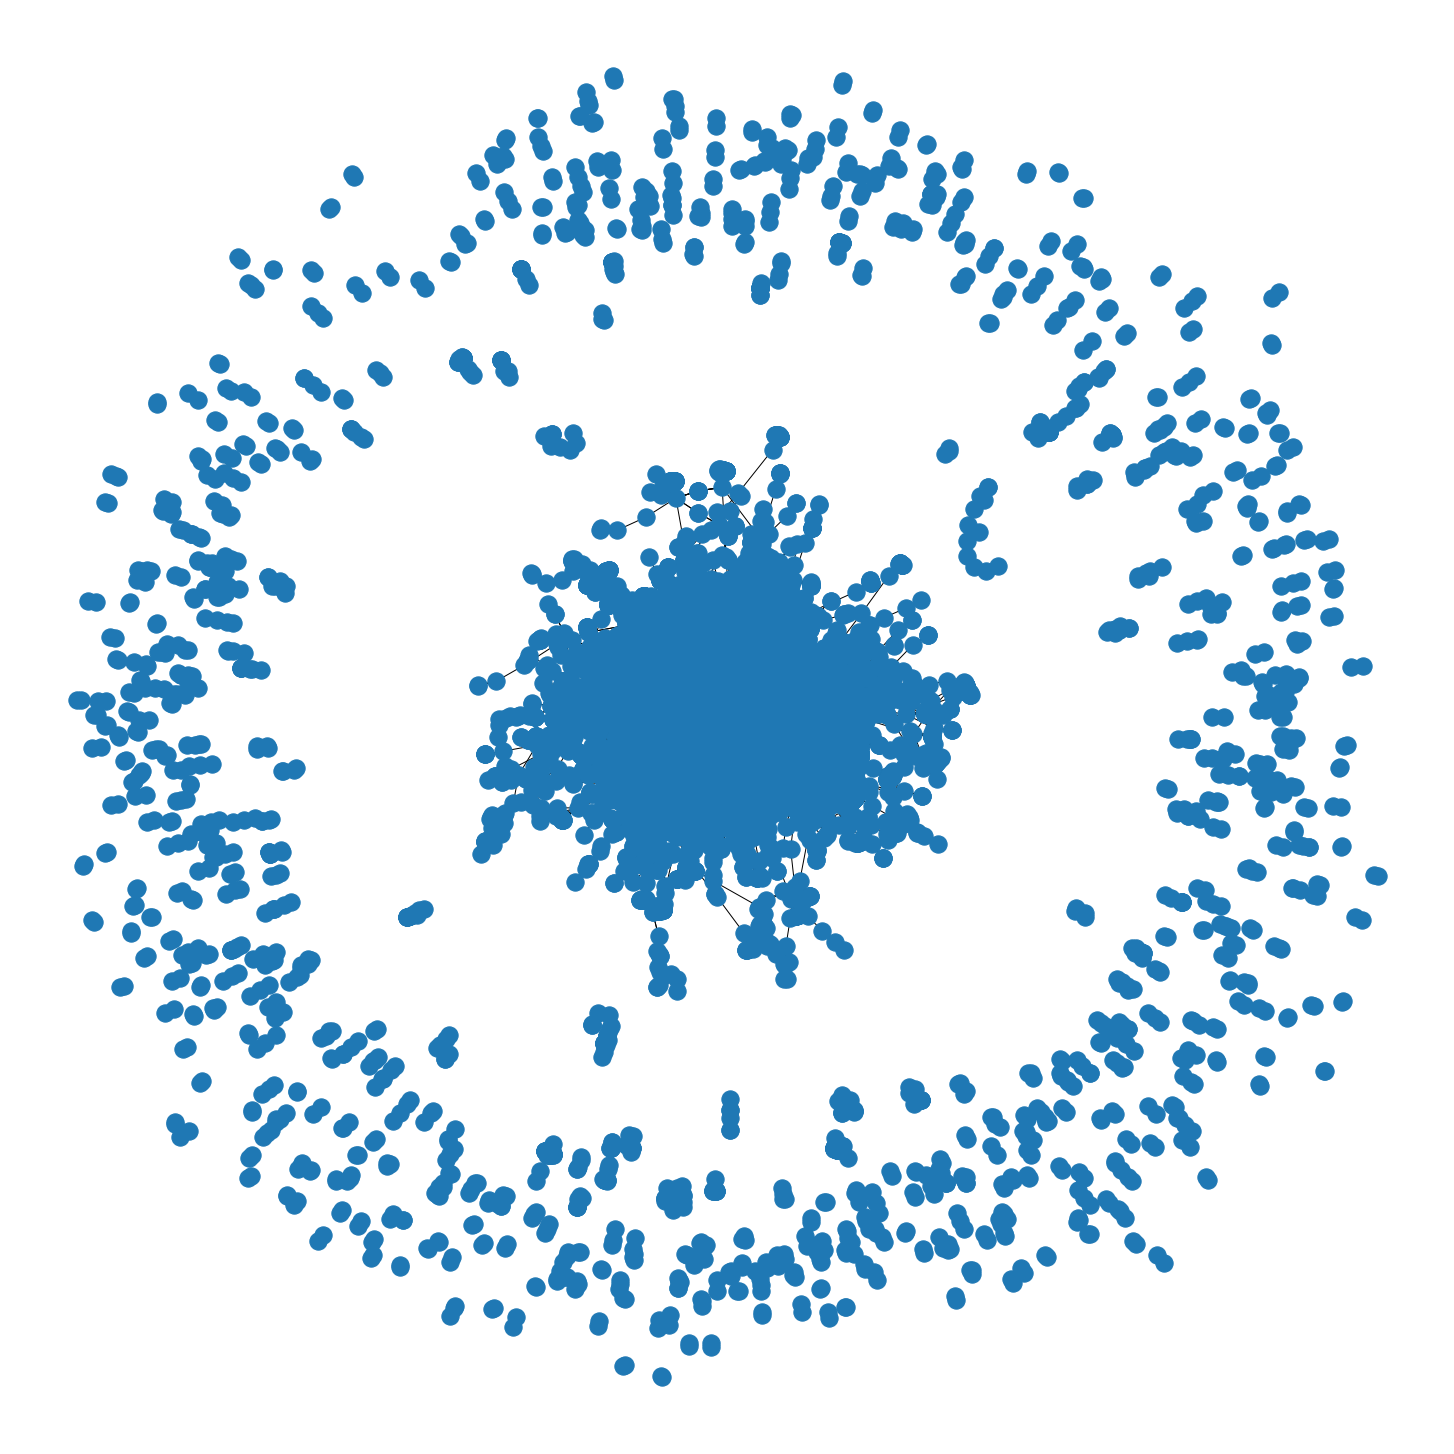

In [48]:
plt.figure(figsize = (20, 20))
nx.draw_spring(drug_target_interactions_graph, node_size = 5)

<BarContainer object of 578 artists>

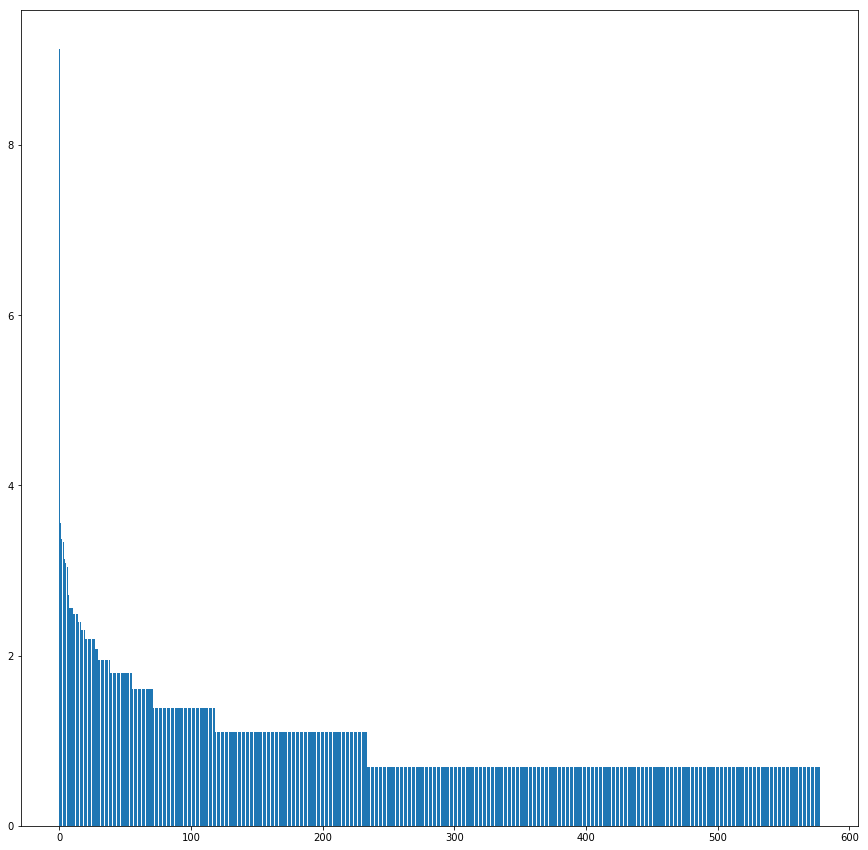

In [75]:
plt.figure(figsize = (15, 15))

plt.bar(range(len(connect_components_list)), sorted(np.log(connect_components_list), reverse = True))

### Seems like there is one huge component and several smaller components. Taking a look at the largest component first

In [90]:
drug_target_interactions_major = list(nx.connected_component_subgraphs(drug_target_interactions_graph))[0]

In [91]:
nx.is_connected(drug_target_interactions_major)

True

## Converting to NetworkX recommended bipartite format

In [92]:
bottom_nodes, top_nodes = bipartite.sets(drug_target_interactions_major)

In [105]:
top_nodes = {n for n, d in drug_target_interactions_major.nodes(data=True) if 'DB' in n}
bottom_nodes = set(drug_target_interactions_major) - top_nodes

In [104]:
[n for n in drug_target_interactions_major.nodes(data=True)]

[('BE0004502', {}),
 ('BE0004037', {}),
 ('BE0001961', {}),
 ('DB04031', {}),
 ('BE0002377', {}),
 ('DB02774', {}),
 ('DB06909', {}),
 ('BE0003538', {}),
 ('DB02213', {}),
 ('DB03132', {}),
 ('DB03673', {}),
 ('DB00108', {}),
 ('DB04068', {}),
 ('BE0004627', {}),
 ('DB05316', {}),
 ('DB00163', {}),
 ('DB02249', {}),
 ('BE0001497', {}),
 ('DB00809', {}),
 ('DB04039', {}),
 ('BE0000840', {}),
 ('DB07200', {}),
 ('DB03877', {}),
 ('DB03479', {}),
 ('DB02989', {}),
 ('BE0008700', {}),
 ('DB05327', {}),
 ('BE0002685', {}),
 ('DB00197', {}),
 ('DB03951', {}),
 ('BE0002202', {}),
 ('DB03313', {}),
 ('DB06288', {}),
 ('BE0003420', {}),
 ('DB00065', {}),
 ('BE0000598', {}),
 ('DB02340', {}),
 ('BE0004524', {}),
 ('BE0002025', {}),
 ('BE0003767', {}),
 ('DB03046', {}),
 ('DB03135', {}),
 ('DB01728', {}),
 ('BE0003738', {}),
 ('BE0002361', {}),
 ('DB07412', {}),
 ('BE0004567', {}),
 ('BE0002078', {}),
 ('DB07339', {}),
 ('BE0004877', {}),
 ('DB01709', {}),
 ('DB00648', {}),
 ('DB06785', {}),
 ('D

In [159]:
drugs_df = drug_target_interactions[['drug_id', 'drug_name', 'drug_cas']].drop_duplicates().set_index('drug_id')
targets_df = drug_target_interactions[['target_id',
                                     'target_amino', 'target_gene',
                                     'target_name']].drop_duplicates().set_index('target_id')



In [160]:
drugs_df['bipartite'] = 0
targets_df['bipartite'] = 1

In [161]:
nodes = drugs_df.to_dict('index')
nodes.update(targets_df.to_dict('index'))

In [162]:
nx.set_node_attributes(drug_target_interactions_major, nodes)

In [163]:
[v for i,v in drug_target_interactions_major.nodes(data = True)]

[{'bipartite': 1,
  'target_amino': '>lcl|BSEQ0013149|Potassium voltage-gated channel subfamily A member 4\nMEVAMVSAESSGCNSHMPYGYAAQARARERERLAHSRAAAAAAVAAATAAVEGSGGSGGG\nSHHHHQSRGACTSHDPQSSRGSRRRRRQRSEKKKAHYRQSSFPHCSDLMPSGSEEKILRE\nLSEEEEDEEEEEEEEEEGRFYYSEDDHGDECSYTDLLPQDEGGGGYSSVRYSDCCERVVI\nNVSGLRFETQMKTLAQFPETLLGDPEKRTQYFDPLRNEYFFDRNRPSFDAILYYYQSGGR\nLKRPVNVPFDIFTEEVKFYQLGEEALLKFREDEGFVREEEDRALPENEFKKQIWLLFEYP\nESSSPARGIAIVSVLVILISIVIFCLETLPEFRDDRDLVMALSAGGHGGLLNDTSAPHLE\nNSGHTIFNDPFFIVETVCIVWFSFEFVVRCFACPSQALFFKNIMNIIDIVSILPYFITLG\nTDLAQQQGGGNGQQQQAMSFAILRIIRLVRVFRIFKLSRHSKGLQILGHTLRASMRELGL\nLIFFLFIGVILFSSAVYFAEADEPTTHFQSIPDAFWWAVVTMTTVGYGDMKPITVGGKIV\nGSLCAIAGVLTIALPVPVIVSNFNYFYHRETENEEQTQLTQNAVSCPYLPSNLLKKFRSS\nTSSSLGDKSEYLEMEEGVKESLCAKEEKCQGKGDDSETDKNNCSNAKAVETDV',
  'target_gene': '>lcl|BSEQ0013150|Potassium voltage-gated channel subfamily A member 4 (KCNA4)\nATGGAGGTTGCAATGGTGAGTGCGGAGAGCTCAGGGTGCAACAGTCACATGCCTTATGGT\nTATGCTGCCCAGGCCCGGGCCCGGGAGCGGGAGAGGCTTGCTCACTCCAGGGCAGCT

In [165]:
nx.bipartite.maximum_matching(drug_target_interactions_major)

{'BE0004502': 'DB02299',
 'BE0004037': 'DB04702',
 'BE0001961': 'DB03698',
 'BE0001497': 'DB02321',
 'BE0002377': 'DB03352',
 'DB00567': 'BE0003624',
 'BE0003538': 'DB04824',
 'BE0003380': 'DB08363',
 'DB01640': 'BE0001223',
 'BE0002363': 'DB01267',
 'DB03141': 'BE0003328',
 'DB00108': 'BE0000590',
 'BE0000129': 'DB00897',
 'BE0004022': 'DB03193',
 'DB04031': 'BE0001896',
 'DB04841': 'BE0000012',
 'DB00686': 'BE0000326',
 'BE0000840': 'DB01254',
 'BE0001126': 'DB08813',
 'DB08413': 'BE0004314',
 'DB00635': 'BE0000329',
 'DB02345': 'BE0004543',
 'BE0008700': 'DB11348',
 'DB02951': 'BE0001650',
 'BE0002685': 'DB01992',
 'DB00197': 'BE0001204',
 'DB03951': 'BE0001567',
 'DB04482': 'BE0001522',
 'BE0003894': 'DB07599',
 'BE0000003': 'DB00142',
 'BE0001725': 'DB03801',
 'BE0000598': 'DB00098',
 'DB02340': 'BE0000004',
 'BE0004524': 'DB01972',
 'BE0002025': 'DB03814',
 'BE0003767': 'DB06980',
 'BE0002731': 'DB02327',
 'BE0003585': 'DB01227',
 'BE0000456': 'DB00200',
 'BE0003738': 'DB01718',
